In [61]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_pd = pd.read_csv(mouse_data)
clinical_pd = pd.read_csv(clinical_data)

# Combine the data into a single dataset
combined_pd = pd.merge(mouse_pd, clinical_pd, on = "Mouse ID")


# Display the data table for preview
combined_pd.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [62]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time = combined_pd.groupby(["Drug","Timepoint"]).mean()
# Convert to DataFrame
combined_df = pd.DataFrame(data = drug_time)
# Preview DataFrame
combined_df = combined_df.drop(["Metastatic Sites"],axis = 1)

pd.set_option('display.max_rows',500)
combined_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [63]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combined_sem = combined_pd.groupby(["Drug","Timepoint"]).sem()
# Convert to DataFrame
combined_sem = pd.DataFrame(data = combined_sem)
# Preview DataFrame

combined_sem = combined_sem.drop(["Metastatic Sites","Mouse ID"], axis = 1)
combined_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [64]:
# Minor Data Munging to Re-Format the Data Frames
new_combined_df = combined_df.unstack().T
new_combined_sem = combined_sem.unstack().T
# Preview that Reformatting worked

new_combined_df

Drug                          Capomulin   Ceftamin  Infubinol   Ketapril  \
                   Timepoint                                               
Tumor Volume (mm3) 0          45.000000  45.000000  45.000000  45.000000   
                   5          44.266086  46.503051  47.062001  47.389175   
                   10         43.084291  48.285125  49.403909  49.582269   
                   15         42.064317  50.094055  51.296397  52.399974   
                   20         40.716325  52.157049  53.197691  54.920935   
                   25         39.939528  54.287674  55.715252  57.678982   
                   30         38.769339  56.769517  58.299397  60.994507   
                   35         37.816839  58.827548  60.742461  63.371686   
                   40         36.958001  61.467895  63.162824  66.068580   
                   45         36.236114  64.132421  65.755562  70.662958   

Drug                           Naftisol    Placebo   Propriva   Ramicane  \
                   Timepoint                                               
Tumor Volume (mm3) 0          45.000000  45.000000  45.000000  45.000000   
                   5          46.796098  47.125589  47.248967  43.944859   
                   10         48.694210  49.423329  49.101541  42.531957   
                   15         50.933018  51.359742  51.067318  41.495061   
                   20         53.644087  54.364417  53.346737  40.238325   
                   25         56.731968  57.482574  55.504138  38.974300   
                   30         59.559509  59.809063  58.196374  38.703137   
                   35         62.685087  62.420615  60.350199  37.451996   
                   40         65.600754  65.052675  63.045537  36.574081   
                   45         69.265506  68.084082  66.258529  34.955595   

Drug                           Stelasyn  Zoniferol  
                   Timepoint                        
Tumor Volume (mm3) 0          45.000000  45.000000  
                   5          47.527452  46.851818  
                   10         49.463844  48.689881  
                   15         51.529409  50.779059  
                   20         54.067395  53.170334  
                   25         56.166123  55.432935  
                   30         59.826738  57.713531  
                   35         62.440699  60.089372  
                   40         65.356386  62.916692  
                   45         68.438310  65.960888

In [65]:
new_combined_sem

Drug                          Capomulin  Ceftamin  Infubinol  Ketapril  \
                   Timepoint                                             
Tumor Volume (mm3) 0           0.000000  0.000000   0.000000  0.000000   
                   5           0.448593  0.164505   0.235102  0.264819   
                   10          0.702684  0.236144   0.282346  0.357421   
                   15          0.838617  0.332053   0.357705  0.580268   
                   20          0.909731  0.359482   0.476210  0.726484   
                   25          0.881642  0.439356   0.550315  0.755413   
                   30          0.934460  0.490620   0.631061  0.934121   
                   35          1.052241  0.692248   0.984155  1.127867   
                   40          1.223608  0.708505   1.055220  1.158449   
                   45          1.223977  0.902358   1.144427  1.453186   

Drug                          Naftisol   Placebo  Propriva  Ramicane  \
                   Timepoint                                           
Tumor Volume (mm3) 0          0.000000  0.000000  0.000000  0.000000   
                   5          0.202385  0.218091  0.231708  0.482955   
                   10         0.319415  0.402064  0.376195  0.720225   
                   15         0.444378  0.614461  0.466109  0.770432   
                   20         0.595260  0.839609  0.555181  0.786199   
                   25         0.813706  1.034872  0.577401  0.746991   
                   30         0.975496  1.218231  0.746045  0.864906   
                   35         1.013769  1.287481  1.084929  0.967433   
                   40         1.118567  1.370634  1.564779  1.128445   
                   45         1.416363  1.351726  1.888586  1.226805   

Drug                          Stelasyn  Zoniferol  
                   Timepoint                       
Tumor Volume (mm3) 0          0.000000   0.000000  
                   5          0.239862   0.188950  
                   10         0.433678   0.263949  
                   15         0.493261   0.370544  
                   20         0.621889   0.533182  
                   25         0.741922   0.602513  
                   30         0.899548   0.800043  
                   35         1.003186   0.881426  
                   40         1.410435   0.998515  
                   45         1.576556   1.003576

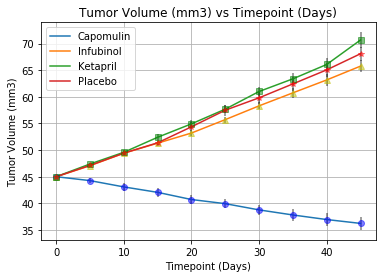

<Figure size 432x288 with 0 Axes>

In [66]:
# Generate the Plot (with Error Bars)

#Capomulin
x_axis = new_combined_df.reset_index()["Timepoint"]
y_axis_cap = new_combined_df["Capomulin"]
sem_cap= new_combined_sem["Capomulin"]

capomulin, = plt.plot(x_axis,y_axis_cap, label = "Capomulin")
plt.errorbar(x_axis, y_axis_cap, yerr = sem_cap,fmt="o", color="b", alpha=0.5, ecolor = 'k')

#Infubinol
x_axis = new_combined_df.reset_index()["Timepoint"]
y_axis_inf = new_combined_df["Infubinol"]
sem_inf = new_combined_sem["Infubinol"]

infubinol, = plt.plot(x_axis,y_axis_inf, label = "Infubinol")
plt.errorbar(x_axis, y_axis_inf, yerr = sem_inf,fmt="^", color="y", alpha=0.5, ecolor = 'k')

#Ketapril
x_axis = new_combined_df.reset_index()["Timepoint"]
y_axis_ket = new_combined_df["Ketapril"]
sem_ket = new_combined_sem["Ketapril"]

ketapril, = plt.plot(x_axis,y_axis_ket, label = "Ketapril")
plt.errorbar(x_axis, y_axis_ket, yerr = sem_ket,fmt="s", color="g", alpha=0.5, ecolor = 'k')

#Placebo
x_axis = new_combined_df.reset_index()["Timepoint"]
y_axis_pla = new_combined_df["Placebo"]
sem_pla = new_combined_sem["Placebo"]

placebo,= plt.plot(x_axis,y_axis_pla, label = "Placebo")
plt.errorbar(x_axis, y_axis_pla, yerr = sem_pla,fmt="*", color="r", alpha=0.5, ecolor = 'k')

# Save the Figure
plt.grid()
plt.legend(loc = "upper left", handles = [capomulin, infubinol, ketapril, placebo])
plt.title ("Tumor Volume (mm3) vs Timepoint (Days)")
plt.xlabel ("Timepoint (Days)")
plt.ylabel ("Tumor Volume (mm3)")


plt.show()
plt.savefig("Tumor_Volume_(mm3)_vs_Timepoint.png")

In [67]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [68]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_pd = combined_pd.groupby(["Drug","Timepoint"]).mean().drop(["Tumor Volume (mm3)"],axis=1)
# Convert to DataFrame
meta_df = pd.DataFrame(data = meta_pd)
# Preview DataFrame
meta_df = meta_df.unstack().T
meta_df

Drug                        Capomulin  Ceftamin  Infubinol  Ketapril  \
                 Timepoint                                             
Metastatic Sites 0           0.000000  0.000000   0.000000  0.000000   
                 5           0.160000  0.380952   0.280000  0.304348   
                 10          0.320000  0.600000   0.666667  0.590909   
                 15          0.375000  0.789474   0.904762  0.842105   
                 20          0.652174  1.111111   1.050000  1.210526   
                 25          0.818182  1.500000   1.277778  1.631579   
                 30          1.090909  1.937500   1.588235  2.055556   
                 35          1.181818  2.071429   1.666667  2.294118   
                 40          1.380952  2.357143   2.100000  2.733333   
                 45          1.476190  2.692308   2.111111  3.363636   

Drug                        Naftisol   Placebo  Propriva  Ramicane  Stelasyn  \
                 Timepoint                                                     
Metastatic Sites 0          0.000000  0.000000  0.000000  0.000000  0.000000   
                 5          0.260870  0.375000  0.320000  0.120000  0.240000   
                 10         0.523810  0.833333  0.565217  0.250000  0.478261   
                 15         0.857143  1.250000  0.764706  0.333333  0.782609   
                 20         1.150000  1.526316  1.000000  0.347826  0.952381   
                 25         1.500000  1.941176  1.357143  0.652174  1.157895   
                 30         2.066667  2.266667  1.615385  0.782609  1.388889   
                 35         2.266667  2.642857  2.300000  0.952381  1.562500   
                 40         2.466667  3.166667  2.777778  1.100000  1.583333   
                 45         2.538462  3.272727  2.571429  1.250000  1.727273   

Drug                        Zoniferol  
                 Timepoint             
Metastatic Sites 0           0.000000  
                 5           0.166667  
                 10          0.500000  
                 15          0.809524  
                 20          1.294118  
                 25          1.687500  
                 30          1.933333  
                 35          2.285714  
                 40          2.785714  
                 45          3.071429

In [69]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = combined_pd.groupby(["Drug","Timepoint"]).sem().drop(["Tumor Volume (mm3)"],axis=1)
# Convert to DataFrame
meta_sem_df = pd.DataFrame(data = meta_sem)
# Preview DataFrame
meta_sem_df = meta_sem_df.drop(["Mouse ID"], axis = 1)
meta_sem_df = meta_sem_df.unstack().T
meta_sem_df

Drug                        Capomulin  Ceftamin  Infubinol  Ketapril  \
                 Timepoint                                             
Metastatic Sites 0           0.000000  0.000000   0.000000  0.000000   
                 5           0.074833  0.108588   0.091652  0.098100   
                 10          0.125433  0.152177   0.159364  0.142018   
                 15          0.132048  0.180625   0.194015  0.191381   
                 20          0.161621  0.241034   0.234801  0.236680   
                 25          0.181818  0.258831   0.265753  0.288275   
                 30          0.172944  0.249479   0.227823  0.347467   
                 35          0.169496  0.266526   0.224733  0.361418   
                 40          0.175610  0.289128   0.314466  0.315725   
                 45          0.202591  0.286101   0.309320  0.278722   

Drug                        Naftisol   Placebo  Propriva  Ramicane  Stelasyn  \
                 Timepoint                                                     
Metastatic Sites 0          0.000000  0.000000  0.000000  0.000000  0.000000   
                 5          0.093618  0.100947  0.095219  0.066332  0.087178   
                 10         0.163577  0.115261  0.105690  0.090289  0.123672   
                 15         0.158651  0.190221  0.136377  0.115261  0.153439   
                 20         0.181731  0.234064  0.171499  0.119430  0.200905   
                 25         0.185240  0.263888  0.199095  0.119430  0.219824   
                 30         0.266667  0.300264  0.266469  0.139968  0.230641   
                 35         0.330464  0.341412  0.366667  0.145997  0.240983   
                 40         0.321702  0.297294  0.433903  0.160591  0.312815   
                 45         0.351104  0.304240  0.428571  0.190221  0.359062   

Drug                        Zoniferol  
                 Timepoint             
Metastatic Sites 0           0.000000  
                 5           0.077709  
                 10          0.109109  
                 15          0.111677  
                 20          0.166378  
                 25          0.236621  
                 30          0.248168  
                 35          0.285714  
                 40          0.299791  
                 45          0.286400

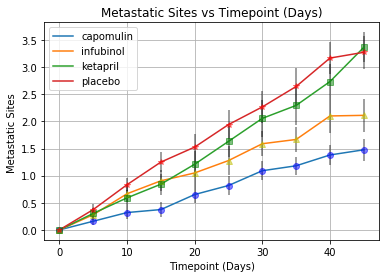

<Figure size 432x288 with 0 Axes>

In [70]:
# Generate the Plot (with Error Bars)

#Capomulin
x_meta = meta_df.reset_index()["Timepoint"]
y_meta_cap = meta_df["Capomulin"]
meta_sem_cap = meta_sem_df ["Capomulin"]

capomulin, = plt.plot(x_meta, y_meta_cap, label = "capomulin")
plt.errorbar(x_meta, y_meta_cap, yerr = meta_sem_cap, fmt="o", color="b", alpha=0.5, ecolor = 'k')

#Infubinol
x_meta = meta_df.reset_index()["Timepoint"]
y_meta_inf = meta_df["Infubinol"]
meta_sem_inf = meta_sem_df ["Infubinol"]

infubinol, = plt.plot(x_meta,y_meta_inf, label = "infubinol")
plt.errorbar(x_meta,y_meta_inf,yerr = meta_sem_inf, fmt="^", color="y", alpha=0.5, ecolor = 'k')

#Ketapril
x_meta = meta_df.reset_index()["Timepoint"]
y_meta_ket = meta_df["Ketapril"]
meta_sem_ket = meta_sem_df ["Ketapril"]

ketapril, = plt.plot(x_meta,y_meta_ket, label = "ketapril")
plt.errorbar(x_meta,y_meta_ket,yerr = meta_sem_ket, fmt="s", color="g", alpha=0.5, ecolor = 'k')

#Placebo
x_meta = meta_df.reset_index()["Timepoint"]
y_meta_pla = meta_df["Placebo"]
meta_sem_pla = meta_sem_df ["Placebo"]

placebo, = plt.plot(x_meta,y_meta_pla, label = "placebo")
plt.errorbar(x_meta,y_meta_pla,yerr = meta_sem_pla, fmt="*", color="r", alpha=0.5, ecolor = 'k')


plt.grid()
plt.legend(loc = "upper left", handles = [capomulin, infubinol, ketapril, placebo])
plt.title ("Metastatic Sites vs Timepoint (Days)")
plt.xlabel ("Timepoint (Days)")
plt.ylabel ("Metastatic Sites ")


plt.show()

# Save the Figure
plt.savefig("Metastatic_Sites_vs_Timepoint.png")
# Show the Figure
plt.show()

## Survival Rates

In [71]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_pd = combined_pd.groupby(["Drug","Timepoint"]).count().drop(["Metastatic Sites"], axis = 1).drop(["Tumor Volume (mm3)"], axis = 1)
survival_pd
# Convert to DataFrame
survival_df = pd.DataFrame(data = survival_pd)
# Preview DataFrame
survival_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [72]:
# Minor Data Munging to Re-Format the Data Frames
survival_df = survival_pd.unstack().T

# Preview the Data Frame
survival_df

Drug                Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  \
         Timepoint                                                       
Mouse ID 0                 25        25         25        25        25   
         5                 25        21         25        23        23   
         10                25        20         21        22        21   
         15                24        19         21        19        21   
         20                23        18         20        19        20   
         25                22        18         18        19        18   
         30                22        16         17        18        15   
         35                22        14         12        17        15   
         40                21        14         10        15        15   
         45                21        13          9        11        13   

Drug                Placebo  Propriva  Ramicane  Stelasyn  Zoniferol  
         Timepoint                                                    
Mouse ID 0               25        26        25        26         25  
         5               24        25        25        25         24  
         10              24        23        24        23         22  
         15              20        17        24        23         21  
         20              19        17        23        21         17  
         25              17        14        23        19         16  
         30              15        13        23        18         15  
         35              14        10        21        16         14  
         40              12         9        20        12         14  
         45              11         7        20        11         14

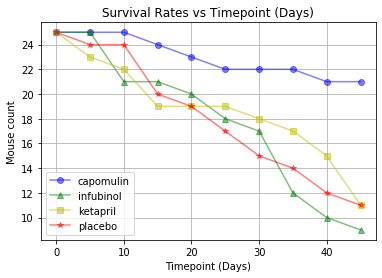

In [73]:
# Generate the Plot (Accounting for percentages)

#Capomulin
x_surv = survival_df.reset_index()["Timepoint"]
y_surv_cap = survival_df["Capomulin"]

capomulin, = plt.plot(x_surv, y_surv_cap, label = "capomulin", marker="o", color="b", alpha=0.5)

#Infubinol
x_surv = survival_df.reset_index()["Timepoint"]
y_surv_inf = survival_df["Infubinol"]

infubinol, = plt.plot(x_surv,y_surv_inf, label = "infubinol", marker="^", color="g", alpha=0.5)

#Ketapril
x_surv= survival_df.reset_index()["Timepoint"]
y_surv_ket = survival_df["Ketapril"]

ketapril, = plt.plot(x_surv,y_surv_ket, label = "ketapril", marker="s", color="y", alpha=0.5)

#Placebo
x_surv = survival_df.reset_index()["Timepoint"]
y_surv_pla = survival_df["Placebo"]

placebo, = plt.plot(x_surv,y_surv_pla, label = "placebo", marker="*", color="r", alpha=0.5)


plt.grid()
plt.legend(loc = "lower left", handles = [capomulin, infubinol, ketapril, placebo])
plt.title ("Survival Rates vs Timepoint (Days)")
plt.xlabel ("Timepoint (Days)")
plt.ylabel ("Mouse count")

# Save the Figure
plt.savefig("Survival_Rates_vs_Timepoint_(Days).png")
plt.show()
# Show the Figure

## Summary Bar Graph

In [74]:
# Calculate the percent changes for each drug
new_combined_df.pct_change()

# Display the data to confirm
per_change_cap = (((new_combined_df["Capomulin"][-1])-(new_combined_df["Capomulin"][0]))/new_combined_df["Capomulin"][0])*100
per_change_cef = (((new_combined_df["Ceftamin"][-1])-(new_combined_df["Ceftamin"][0]))/new_combined_df["Ceftamin"][0])*100
per_change_inf = (((new_combined_df["Infubinol"][-1])-(new_combined_df["Infubinol"][0]))/new_combined_df["Infubinol"][0])*100
per_change_ket = (((new_combined_df["Ketapril"][-1])-(new_combined_df["Ketapril"][0]))/new_combined_df["Ketapril"][0])*100
per_change_naf = (((new_combined_df["Naftisol"][-1])-(new_combined_df["Naftisol"][0]))/new_combined_df["Naftisol"][0])*100
per_change_pla = (((new_combined_df["Placebo"][-1])-(new_combined_df["Placebo"][0]))/new_combined_df["Placebo"][0])*100
per_change_pro = (((new_combined_df["Propriva"][-1])-(new_combined_df["Propriva"][0]))/new_combined_df["Propriva"][0])*100
per_change_ram = (((new_combined_df["Ramicane"][-1])-(new_combined_df["Ramicane"][0]))/new_combined_df["Ramicane"][0])*100
per_change_ste = (((new_combined_df["Stelasyn"][-1])-(new_combined_df["Stelasyn"][0]))/new_combined_df["Stelasyn"][0])*100
per_change_zon = (((new_combined_df["Zoniferol"][-1])-(new_combined_df["Zoniferol"][0]))/new_combined_df["Zoniferol"][0])*100

tumor_per_change_all = {"Capomulin":per_change_cap,
                       "Ceftamin":per_change_cef,
                       "Infubinol":per_change_inf,
                       "Ketapril":per_change_ket,
                       "Naftisol":per_change_naf,
                       "Placebo":per_change_pla,
                       "Propriva":per_change_pro,
                       "Ramicane":per_change_ram,
                       "Stelasyn":per_change_ste,
                       "Zoniferol":per_change_zon}
tumor_per_change_all

{'Capomulin': -19.475302667894173,
 'Ceftamin': 42.51649185589744,
 'Infubinol': 46.12347172785187,
 'Ketapril': 57.028794686606076,
 'Naftisol': 53.92334713476923,
 'Placebo': 51.29796048315153,
 'Propriva': 47.24117486320637,
 'Ramicane': -22.320900462766673,
 'Stelasyn': 52.085134287899024,
 'Zoniferol': 46.57975086509525}

[('Infubinol', 46.12347172785187), ('Ketapril', 57.028794686606076), ('Placebo', 51.29796048315153)]
[('Capomulin', -19.475302667894173)]


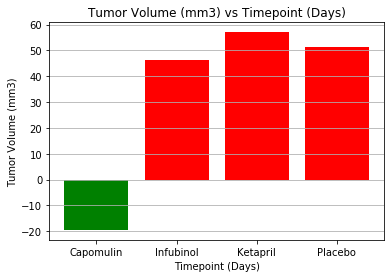

In [78]:
# Store all Relevant Percent Changes into a Tuple
tumor_per_change_select = (tumor_per_change_all["Capomulin"], 
                           tumor_per_change_all["Infubinol"],
                           tumor_per_change_all["Ketapril"],
                           tumor_per_change_all["Placebo"])
tumor_per_change_select

# Splice the data between passing and failing drugs
select_drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]

failed_drugs = [(x,y) for x,y in zip(select_drugs,tumor_per_change_select) if y > 0]
passed_drugs = [(x,y) for x,y in zip(select_drugs,tumor_per_change_select) if y < 0]

print(failed_drugs)
print(passed_drugs)

colors = []
for x in tumor_per_change_select:
    if x>0:
        colors.append('r')
    elif x<0:
        colors.append('g')
    
plt.bar(select_drugs,tumor_per_change_select, align = "center", color = colors)

plt.grid(axis = "y")

plt.title ("Tumor Volume (mm3) vs Timepoint (Days)")
plt.xlabel ("Timepoint (Days)")
plt.ylabel ("Tumor Volume (mm3)")


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig("Summary Bar Graph--Pass vs Fail.png")

# Show the Figure
plt.show()